In [1]:
#读取csv中关于mnist数据集的数据
import numpy as np
import csv


train = csv.reader(open('mnist_train.csv', 'r'))
train_content = []
for line in train:
    train_content.append(line)

test = csv.reader(open('mnist_test.csv', 'r'))
test_content = []
for line in test:
    test_content.append(line)

In [2]:
#将读取的数据集转换为我们需要的张量
train_content = np.array(train_content, dtype=np.float32)
test_content = np.array(test_content, dtype=np.float32)

train_label = np.array(train_content[:, 0], dtype=np.int)
train_x = train_content[:,1 :]
test_label = np.array(test_content[:, 0], dtype=np.int)
test_x = test_content[:, 1:]

assert train_x.shape[1] == test_x.shape[1]
print('Number of input is %d' % train_x.shape[1])
num_input = train_x.shape[1]

Number of input is 784


<ipython-input-2-cdc620842d55>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_label = np.array(train_content[:, 0], dtype=np.int)
<ipython-input-2-cdc620842d55>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated

In [3]:
#像素值中心化及归一化（标准化）
train_x = (train_x - 255/2) / 255
test_x = (test_x - 255/2) / 255

In [4]:
from two_layer import NN_xjx
#模型实例化
model = NN_xjx(lr=0.5, num_in=784, num_out=10, hidden=[40, 30], weight_scale=0.1,batch_size=2000, L2=1e-5, epoch=1000,lr_schedule='decay')

In [5]:
#训练模型
model.train(train_x, train_label) 

Epochs 0 -- Acc: [11.850%], Loss: [68.97024]
Epochs 10 -- Acc: [77.708%], Loss: [23.16448]
Epochs 20 -- Acc: [87.908%], Loss: [13.14745]
Epochs 30 -- Acc: [90.928%], Loss: [9.86516]
Epochs 40 -- Acc: [92.438%], Loss: [8.18866]
Epochs 50 -- Acc: [93.485%], Loss: [7.06507]
Epochs 60 -- Acc: [94.325%], Loss: [6.25087]
Epochs 70 -- Acc: [94.958%], Loss: [5.63047]
Epochs 80 -- Acc: [95.397%], Loss: [5.14240]
Epochs 90 -- Acc: [95.778%], Loss: [4.74974]
Epochs 100 -- Acc: [96.047%], Loss: [4.42767]
Epochs 110 -- Acc: [96.308%], Loss: [4.15833]
Epochs 120 -- Acc: [96.538%], Loss: [3.92861]
Epochs 130 -- Acc: [96.763%], Loss: [3.72908]
Epochs 140 -- Acc: [96.925%], Loss: [3.55318]
Epochs 150 -- Acc: [97.065%], Loss: [3.39630]
Epochs 160 -- Acc: [97.210%], Loss: [3.25519]
Epochs 170 -- Acc: [97.352%], Loss: [3.12741]
Epochs 180 -- Acc: [97.467%], Loss: [3.01112]
Epochs 190 -- Acc: [97.555%], Loss: [2.90484]
Epochs 200 -- Acc: [97.658%], Loss: [2.80731]
Epochs 210 -- Acc: [97.743%], Loss: [2.717

In [6]:
#在test集上测试模型（查看是否过拟合）
model.test(test_x, test_label)

Test acc is 0.97060


0.9706

Text(0, 0.5, 'Loss')

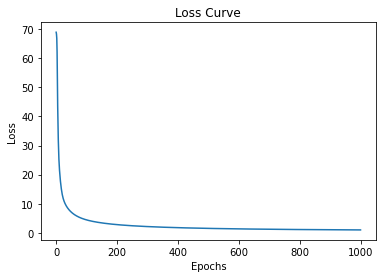

In [7]:
#绘制loss曲线
import matplotlib.pyplot as plt
loss = model.get_loss_history()
%matplotlib inline
plt.plot(loss)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

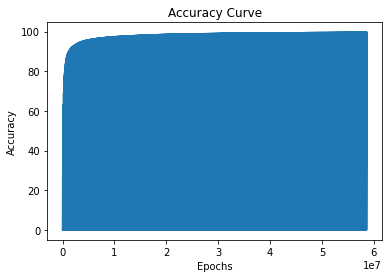

In [8]:
#绘制准确率曲线
import matplotlib.pyplot as plt
acc = model.get_acc_history()
%matplotlib inline
plt.plot(acc)
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [9]:
#保存模型
model.save_para()